<a href="https://colab.research.google.com/github/AnaCristina1972/projett/blob/master/Aula2_RedesNeurais_keras_aula_Classificac%CC%A7a%CC%83o1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais com Keras

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [35]:
def plotimages(imgs, n_row = 1, n_col = 5, cmap='gray', titles = None):
    _, axs = plt.subplots(n_row, n_col, figsize=(12, 6))
    axs = axs.flatten()
    for i, (img, ax) in enumerate(zip(imgs, axs)):
        if titles is not None:
            ax.set_title(titles[i])
        ax.imshow(img, cmap=cmap)
        ax.axis('off')
    plt.show()

## Dataset

Como base de dados, vamos usar a coleção fashion_mnist, fornecida com o keras:

In [36]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

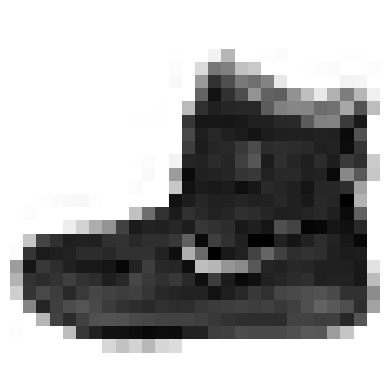

In [37]:
plt.imshow(X_train_full[0], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Este é um problema de classificação. Os rótulos originais são de 0 a 9:

In [6]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Os nomes correspondentes das classes em termos de peças de vestuário:

In [38]:
class_names = ["Camisetas/tops", "Calças", "Pulôver", "Vestido", "Casaco",
               "Sandália", "Camisa", "Tênis", "Bolsa", "Meia bota"]

Portanto, a primeira imagem das base de treino é Meia bota

In [39]:
class_names[y_train_full[0]]

'Meia bota'

Vamos dividir a base de treinamento para criar a base de validação.

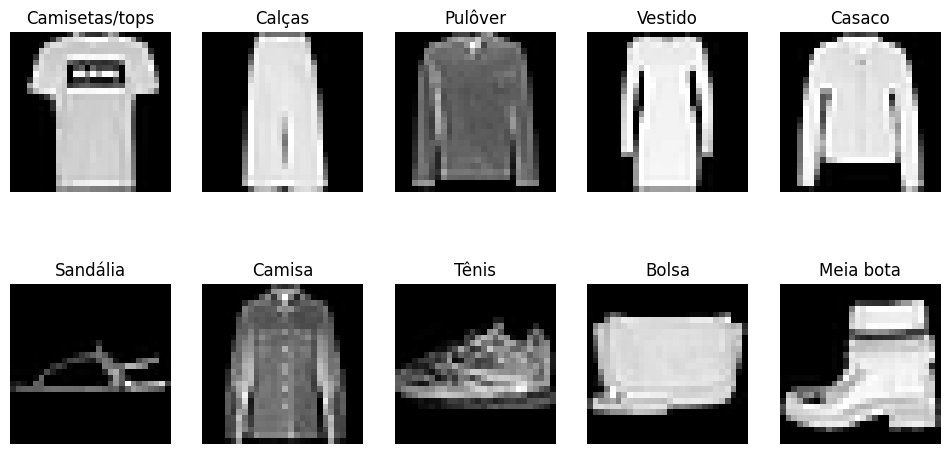

In [40]:
sample = [X_train_full[y_train_full==c][np.random.randint(0,100)] for c in range(len(class_names))]
plotimages(sample, n_row=2, titles = class_names)

Para trabalhar com redes neurais presisamos de 3 bases, treino, teste e validação

In [41]:
X_valid = X_train_full[:5000]
X_train = X_train_full[5000:]

X_train = (X_train - X_train.mean()) / X_train.std() # Normalização dos dados . Isso é o desvio padrão X_train.std()
X_valid = (X_valid - X_valid.mean()) / X_valid.std()

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
X_train[0]

array([[-0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.79940127,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365],
       [-0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.32156893,  0.60075862,  1.21193953,  1.24527667,
         0.97857955,  0.52297196, -0.19933275, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365],
       [-0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.34379369,
         1.38973761,  1.9786

In [22]:
X_train.shape

(55000, 28, 28)

In [23]:
X_valid.shape

(5000, 28, 28)

## Uma rede Neural com Keras

#### Estilos, treino, teste e avaliação

O Keras possui três estilos de descrição de uma rede neural: (1) sequêncial, (2) funcional e (3) orientado a objetos (sub-classing). Vamos ver exemplos destas formas:

In [60]:
# um modelo sequencial
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # O flatten vetoriza a imagem
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 150)               45150     
                                                                 
 dense_7 (Dense)             (None, 100)               15100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 301310 (1.15 MB)
Trainable params: 30131

Outra forma de mostrar o modelo da arquitetura.

In [ ]:
tf.keras.utils.plot_model(model, "meu_primeiro_modelo.png", show_shapes=True)

In [51]:
# um modelo funcional
model_input = keras.layers.Input(shape=(28, 28), name="images")
X = keras.layers.Flatten(name="input")(model_input)
X = keras.layers.Dense(300, activation="relu", name="h1")(X)
X = keras.layers.Dense(150, activation="relu", name="h2")(X)
X = keras.layers.Dense(100, activation="relu", name="h3")(X)
X = keras.layers.Dense(50, activation="relu", name="h4")(X)
yhat = keras.layers.Dense(10, activation="softmax", name="output")(X)

model = keras.models.Model(inputs=[model_input], outputs=[yhat])

In [ ]:
model.summary()

In [ ]:
# um modelo com subclassing
class SeqModel(keras.models.Model):
    def __init__(self, **kwargs):
        # call the parent constructor
        super(SeqModel, self).__init__(**kwargs)
        # initialize the layers
        self.input_layer = keras.layers.Flatten(name="input_layer")
        self.h1 = keras.layers.Dense(300, activation="relu", name="h1")
        self.h2 = keras.layers.Dense(150, activation="relu", name="h2")
        self.h3 = keras.layers.Dense(100, activation="relu", name="h3")
        self.h4 = keras.layers.Dense(50, activation="relu", name="h4")
        self.out_layer = keras.layers.Dense(10, activation="softmax", name="out_layer")

    def call(self, inputs):
        x = self.input_layer(inputs)
        x = self.h1(x)
        x = self.h2(x)
        x = self.h3(x)
        x = self.h4(x)
        x = self.out_layer(x)
        return x

model = SeqModel()

In [61]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [46]:
history = model.fit(X_train, y_train,
                    epochs=30, batch_size = 100,
                    validation_data=(X_valid, y_valid))# batch_size e o minilote

Epoch 1/30
550/550 [==============================] - 2s 3ms/step - loss: 0.2553 - accuracy: 0.9066 - val_loss: 0.3107 - val_accuracy: 0.8866
Epoch 2/30
550/550 [==============================] - 2s 4ms/step - loss: 0.2485 - accuracy: 0.9100 - val_loss: 0.3155 - val_accuracy: 0.8858
Epoch 3/30
550/550 [==============================] - 2s 3ms/step - loss: 0.2422 - accuracy: 0.9113 - val_loss: 0.3015 - val_accuracy: 0.8888
Epoch 4/30
550/550 [==============================] - 2s 3ms/step - loss: 0.2363 - accuracy: 0.9138 - val_loss: 0.3045 - val_accuracy: 0.8924
Epoch 5/30
550/550 [==============================] - 2s 3ms/step - loss: 0.2303 - accuracy: 0.9160 - val_loss: 0.3064 - val_accuracy: 0.8926
Epoch 6/30
550/550 [==============================] - 2s 3ms/step - loss: 0.2251 - accuracy: 0.9182 - val_loss: 0.3005 - val_accuracy: 0.8890
Epoch 7/30
550/550 [==============================] - 2s 3ms/step - loss: 0.2189 - accuracy: 0.9211 - val_loss: 0.2992 - val_accuracy: 0.8916
Epoch 

In [27]:
history = model.fit(X_train, y_train,
                    epochs=20, batch_size = 100,
                    validation_data=(X_valid, y_valid))# batch_size e o minilote

Epoch 1/20
550/550 [==============================] - 3s 4ms/step - loss: 0.7526 - accuracy: 0.7419 - val_loss: 0.4932 - val_accuracy: 0.8216
Epoch 2/20
550/550 [==============================] - 2s 3ms/step - loss: 0.4671 - accuracy: 0.8334 - val_loss: 0.4226 - val_accuracy: 0.8486
Epoch 3/20
550/550 [==============================] - 2s 3ms/step - loss: 0.4172 - accuracy: 0.8515 - val_loss: 0.4076 - val_accuracy: 0.8542
Epoch 4/20
550/550 [==============================] - 2s 3ms/step - loss: 0.3873 - accuracy: 0.8610 - val_loss: 0.3799 - val_accuracy: 0.8626
Epoch 5/20
550/550 [==============================] - 3s 5ms/step - loss: 0.3642 - accuracy: 0.8685 - val_loss: 0.3626 - val_accuracy: 0.8676
Epoch 6/20
550/550 [==============================] - 2s 3ms/step - loss: 0.3482 - accuracy: 0.8741 - val_loss: 0.3464 - val_accuracy: 0.8706
Epoch 7/20
550/550 [==============================] - 2s 3ms/step - loss: 0.3341 - accuracy: 0.8796 - val_loss: 0.3433 - val_accuracy: 0.8746
Epoch 

A seguir, temos um resumo do modelo, que nos ajuda a entender sua complexidade: mais de 300 mil parâmetros!

In [33]:
history1=history

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 150)               45150     
                                                                 
 dense_7 (Dense)             (None, 100)               15100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 301310 (1.15 MB)
Trainable params: 30131

Note que o log do treino guarda informação sobre todas as métricas avaliadas ao longo das épocas, como um dicionário Python:

In [29]:
history.history

{'loss': [0.7525646090507507,
  0.46712103486061096,
  0.4172149896621704,
  0.3873178958892822,
  0.36419281363487244,
  0.3482283651828766,
  0.33413153886795044,
  0.3228243589401245,
  0.3130057752132416,
  0.3027404546737671,
  0.2930067479610443,
  0.2856346368789673,
  0.278108686208725,
  0.2702534794807434,
  0.2642662525177002,
  0.25729045271873474,
  0.24975468218326569,
  0.24404005706310272,
  0.23704683780670166,
  0.23332028090953827],
 'accuracy': [0.7419090867042542,
  0.8333636522293091,
  0.8515090942382812,
  0.860981822013855,
  0.8685454726219177,
  0.8741272687911987,
  0.8796363472938538,
  0.8822545409202576,
  0.8860181570053101,
  0.8903999924659729,
  0.8929272890090942,
  0.8965636491775513,
  0.8983818292617798,
  0.9021454453468323,
  0.9041454792022705,
  0.906781792640686,
  0.908054530620575,
  0.9108181595802307,
  0.9140363931655884,
  0.9149272441864014],
 'val_loss': [0.493227481842041,
  0.42263585329055786,
  0.4075506925582886,
  0.379923999309

Isso nos permite facilmente avaliar estes números, com ajuda do Pandas:

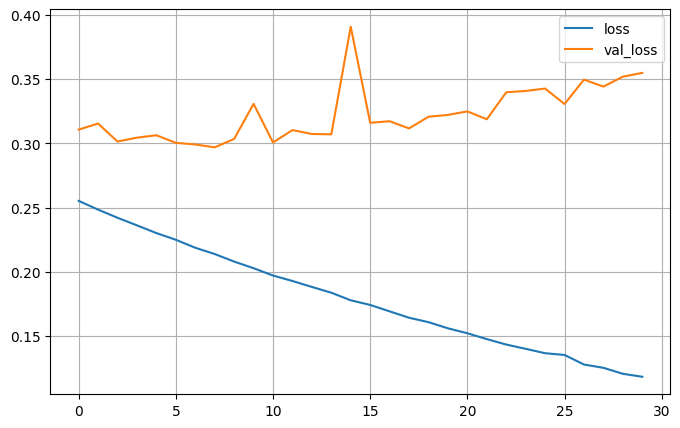

In [47]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Para avaliar o modelo, podemos usar evalute:

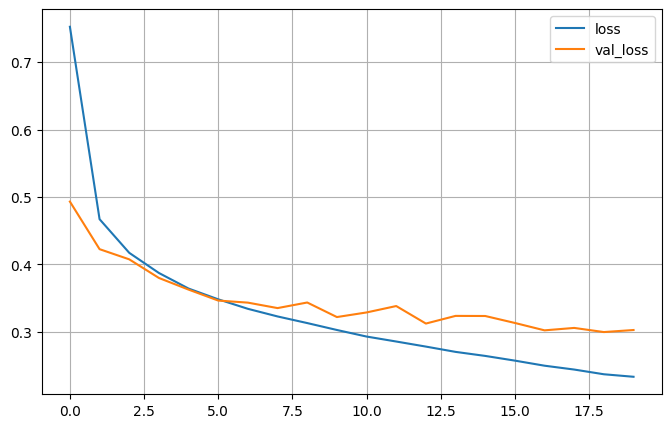

In [49]:
pd.DataFrame(history1.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_test.shape

# **Parada antecipada**

Uma das estratégias mais comuns para se evitar overfitting é parar o treino quando o resultado na coleção de validação já não melhora mais. Isto é comumente chamado de parada antecipada e é implementado no Keras pelo callback `EarlyStopping`:

In [62]:
#Chamando um callback do Keras
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss", # pare se val_loss não está mais melhorando
        min_delta=1e-2, # considere que não está mais melhorando se diferença para 0 é maior que 1e-2
        patience=5, # número de épocas sem melhoria que devem ser observadas
        verbose=1,
    )
]

In [63]:
history = model.fit(X_train, y_train,
                    epochs=30, callbacks = callbacks, batch_size = 100,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
550/550 [==============================] - 3s 4ms/step - loss: 0.7554 - accuracy: 0.7403 - val_loss: 0.5227 - val_accuracy: 0.8158
Epoch 2/30
550/550 [==============================] - 3s 6ms/step - loss: 0.4668 - accuracy: 0.8309 - val_loss: 0.4254 - val_accuracy: 0.8514
Epoch 3/30
550/550 [==============================] - 2s 3ms/step - loss: 0.4142 - accuracy: 0.8511 - val_loss: 0.4303 - val_accuracy: 0.8398
Epoch 4/30
550/550 [==============================] - 2s 3ms/step - loss: 0.3846 - accuracy: 0.8618 - val_loss: 0.3797 - val_accuracy: 0.8632
Epoch 5/30
550/550 [==============================] - 2s 3ms/step - loss: 0.3630 - accuracy: 0.8697 - val_loss: 0.3603 - val_accuracy: 0.8682
Epoch 6/30
550/550 [==============================] - 2s 3ms/step - loss: 0.3459 - accuracy: 0.8754 - val_loss: 0.3595 - val_accuracy: 0.8712
Epoch 7/30
550/550 [==============================] - 2s 4ms/step - loss: 0.3316 - accuracy: 0.8788 - val_loss: 0.3499 - val_accuracy: 0.8732
Epoch 

Isso nos permite facilmente avaliar estes números, com ajuda do Pandas:

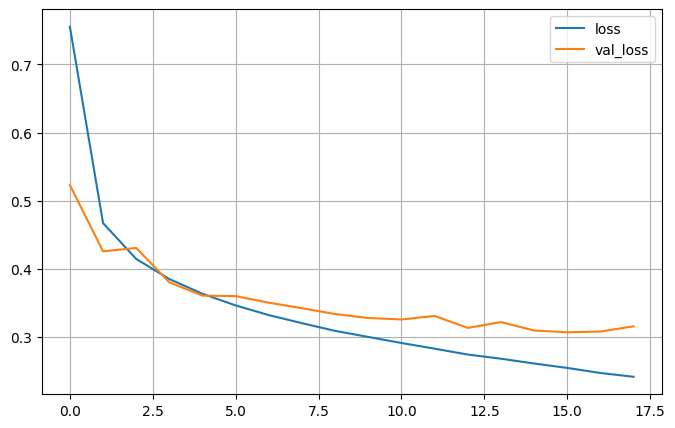

In [64]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Para avaliar o modelo, podemos usar evalute:

In [65]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 28.1764 - accuracy: 0.7368


[28.176433563232422, 0.7368000149726868]